## Summary

To apply the technique of principal components analysis to the given problem of predicting customer value.

In [74]:
# For logging the time taken for a step.
import time

import sys
sys.path.append('../../common_routines')

from relevant_functions import (get_train_data, 
                                get_test_data, 
                                get_all_predictor_cols, 
                                get_rel_cols)

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

import numpy as np

In [4]:
INPUT_DIR = '../../input/'

In [6]:
ts = time.time()
train = get_train_data(INPUT_DIR)
time.time() - ts

5.292061805725098

### Construct a PCA pipeline

We construct a pipe with PCA and a linear model as it's components and use the same to do cross validation on the training data.

In [10]:
def get_pca_linear_model_pipeline(num_pca_components=5):
    pca = PCA(n_components=num_pca_components, random_state=0)
    my_pipe = Pipeline([('pca', pca),
                        ('model', LinearRegression())])
    
    return my_pipe

In [11]:
all_predictor_cols = get_all_predictor_cols(train)

In [28]:
def compute_pca_cross_validation_output(X, Y, num_pca_components):
    cross_val_scores = cross_val_score(get_pca_linear_model_pipeline(num_pca_components=num_pca_components), 
                                       X, Y, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-cross_val_scores.mean())

In [24]:
X = train[all_predictor_cols]
Y = train[['log_target']]

In [31]:
ts = time.time()
num_pca_comp_to_pca_cross_val_score = dict()
# WARNING : Code execution can take a very long time. Hence it is advised to execute the loop in pieces
#for i in range(1, 251):
#    num_pca_comp_to_pca_cross_val_score[i] = compute_pca_cross_validation_output(X, Y, num_pca_components=i)
#time.time() - ts

81.1446442604065

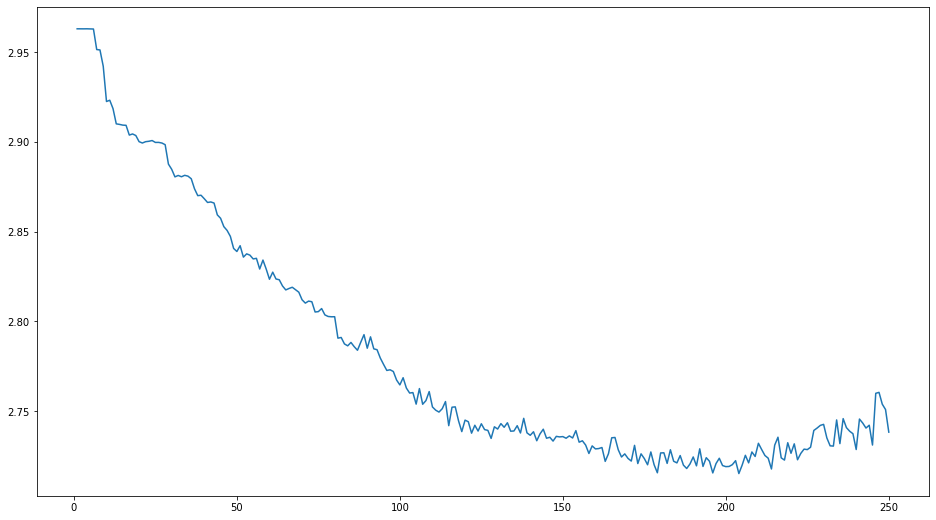

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
ax.plot(list(num_pca_comp_to_pca_cross_val_score.keys()), 
        list(num_pca_comp_to_pca_cross_val_score.values()))

In [84]:
min(num_pca_comp_to_pca_cross_val_score, key=num_pca_comp_to_pca_cross_val_score.get)

204

In [86]:
import operator
num_pca_comp_to_pca_cross_val_score_sorted = sorted(num_pca_comp_to_pca_cross_val_score.items(), 
                                                    key=operator.itemgetter(1))

In [87]:
num_pca_comp_to_pca_cross_val_score_sorted

[(204, 2.7151174478730087),
 (196, 2.7154659953375178),
 (179, 2.7155556343186724),
 (214, 2.717667845685748),
 (188, 2.71793965245079),
 (200, 2.718980900485312),
 (201, 2.7190754829022827),
 (193, 2.7190799012440507),
 (191, 2.719422246556109),
 (199, 2.7195826652004835),
 (205, 2.719758967239867),
 (187, 2.7198035441074855),
 (176, 2.720017807488309),
 (178, 2.7200469746610816),
 (202, 2.7200729231268896),
 (189, 2.72043772458593),
 (173, 2.7206979249040644),
 (197, 2.7206983070641577),
 (182, 2.720789239741659),
 (185, 2.721063361703433),
 (207, 2.7210864673307404),
 (163, 2.7219125197193774),
 (195, 2.7219560345612757),
 (184, 2.721978280802058),
 (171, 2.7220826415546133),
 (203, 2.7222983860287036),
 (218, 2.7226260643684865),
 (222, 2.722805912288523),
 (175, 2.723486205234562),
 (170, 2.7235518156882277),
 (198, 2.7236368941365368),
 (213, 2.723691566995922),
 (217, 2.723867950345543),
 (194, 2.7239548250441077),
 (168, 2.724350624592972),
 (190, 2.7243709670055156),
 (209, 2.

### Running the same experiment using log transformed predictors.

Since we had seen evidence of heteroskedasticity in an earlier notebook, this would be an interesting experiment.

In [88]:
train_new = train.copy()

In [89]:
for col in all_predictor_cols:
    train_new['log_' + col] = np.log(train_new[col] + 1.0)

In [90]:
all_log_predictors_cols = ['log_' + col for col in all_predictor_cols]

In [91]:
X = train_new[all_log_predictors_cols]
Y = train_new[['log_target']]

In [ ]:
num_pca_comp_log_to_pca_cross_val_score = dict()

In [ ]:
ts = time.time()
# Commenting out as the execution can be time consuming.
#for i in range(1, 101):
#    num_pca_comp_log_to_pca_cross_val_score[i] = compute_pca_cross_validation_output(X, Y, num_pca_components=i)
time.time() - ts

In [ ]:
#fig, ax = plt.subplots(1, 1, figsize=(16, 9))
#ax.plot(list(num_pca_comp_to_pca_cross_val_score.keys()), 
#        list(num_pca_comp_to_pca_cross_val_score.values()))

### Selecting the optimal number of principal components.

After inspecting the models trained using the original predictors as well as log transformed ones, we decide to go ahead with the former. 

Though the absolute minima for the cross validation error was obtained when the number of principal components was 204, we do see that the error was quite close to the absolute minimum when the number of components was 179. Since we desire a simpler model, we decide to use the latter one.

In [92]:
ts = time.time()
test = get_test_data(INPUT_DIR)
time.time() - ts

In [94]:
my_pipe = get_pca_linear_model_pipeline(num_pca_components=179)

In [96]:
X = train[all_predictor_cols]
Y = train[['log_target']]
my_pipe.fit(X, Y)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=179,
                     random_state=0, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [98]:
new_X = test[all_predictor_cols]
test_log_predictions = my_pipe.predict(new_X)

test_log_predictions[test_log_predictions < 0]= 0

test['target'] = np.exp(test_log_predictions) - 1.0

In [102]:
test[['ID', 'target']].to_csv('submission_principal_components_analysis.csv', index=False)
# Gave a private test score of 1.87